In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Vaccination Dataset

In [2]:
vac = pd.read_csv('COVID-19_Vaccination_by_Town_and_Race_Ethnicity_-_ARCHIVED.csv')
vac.head()

,Town name,Vaccination status,Race/ethnicity,Data type,Value,Date updated
0,Andover,At least one dose,Total,Count,1995.0,06/16/2021
1,Ansonia,At least one dose,Total,Count,9286.0,06/16/2021
2,Ashford,At least one dose,Total,Count,2471.0,06/16/2021
3,Avon,At least one dose,Total,Count,13835.0,06/16/2021
4,Barkhamsted,At least one dose,Total,Count,2241.0,06/16/2021


In [3]:
vac = vac.loc[(vac['Date updated'] == '07/20/2022') &
              (vac['Data type'] == 'Percentage'),]
vac = vac.drop(columns = 'Date updated')

print(len(vac))
vac = vac.dropna()
print(len(vac))
vac = vac.reset_index(drop = True)
vac.head()

2028
1911


,Town name,Vaccination status,Race/ethnicity,Data type,Value
0,Andover,At least one dose,Total,Percentage,75.6
1,Ansonia,At least one dose,Total,Percentage,71.1
2,Ashford,At least one dose,Total,Percentage,73.0
3,Avon,At least one dose,Total,Percentage,95.5
4,Barkhamsted,At least one dose,Total,Percentage,76.2


In [4]:
random_towns = vac['Town name'].sample(n = 25, random_state = 25)
sampledf = vac[vac['Town name'].isin(random_towns)]
sampledf.head()

,Town name,Vaccination status,Race/ethnicity,Data type,Value
20,Canaan,At least one dose,Total,Percentage,100.0
42,East Haven,At least one dose,Total,Percentage,72.0
43,East Lyme,At least one dose,Total,Percentage,86.1
68,Killingly,At least one dose,Total,Percentage,66.0
70,Lebanon,At least one dose,Total,Percentage,74.0


In [5]:
def create_hist(df, vac_stat, race):
    subdf = df.loc[(df['Vaccination status'] == vac_stat) &
                   (df['Race/ethnicity'] == race)]
    #print(subdf.head())
    #print(len(subdf))
    plt.figure(figsize = (16, 8))
    ax = sns.barplot(data = subdf, x = "Town name", y = "Value", palette = 'mako')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    plt.title("{} percentage of {} by Town".format(vac_stat, race))
    plt.xlabel("Town")
    plt.ylabel("Percentage of {}".format(vac_stat))
    plt.xticks(rotation = 90)
    plt.tight_layout()
    
    plt.savefig("EDA/Vac/{}Hist{}ByTown".format(vac_stat, race))
    plt.clf()

In [6]:
status = list(set(vac['Vaccination status']))
races = list(set(vac['Race/ethnicity']))
for s in status:
    for r in races:
        create_hist(sampledf, s, r)

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [7]:
print("Race and Ethnicity Values")
print("=" * 50)
print(set(vac['Race/ethnicity']))
print()
print("All Town Names")
print("=" * 50)
print(set(vac["Town name"]))
print()
print("Number of Towns")
print("=" * 50)
print(len(set(vac['Town name'])))
print()
print("Vaccination Status \n" + "=" * 50)
print(set(vac['Vaccination status']))


Race and Ethnicity Values
{'NH White', 'NH Black', 'Hispanic', 'NH Asian or Pacific Islander', 'NH American Indian', 'Total'}

All Town Names
{'Bethany', 'Derby', 'Prospect', 'Wolcott', 'Old Lyme', 'Morris', 'Coventry', 'Hartford', 'Middletown', 'Southington', 'Ansonia', 'Eastford', 'Hartland', 'Roxbury', 'Plainville', 'Windsor', 'Canaan', 'Windham', 'Milford', 'Willington', 'Groton', 'Orange', 'Westbrook', 'Enfield', 'Bloomfield', 'West Haven', 'Weston', 'Bethel', 'East Haven', 'Bethlehem', 'Greenwich', 'Bolton', 'Fairfield', 'Shelton', 'Chaplin', 'Marlborough', 'New Canaan', 'Norwich', 'Woodstock', 'East Hartford', 'Bristol', 'North Canaan', 'Middlefield', 'Plymouth', 'Sprague', 'Clinton', 'Westport', 'Woodbridge', 'Easton', 'New Fairfield', 'Rocky Hill', 'Burlington', 'North Haven', 'Simsbury', 'West Hartford', 'Beacon Falls', 'Trumbull', 'Lebanon', 'Columbia', 'East Hampton', 'Andover', 'Hamden', 'Thomaston', 'Newington', 'Granby', 'Woodbury', 'Killingworth', 'Hampton', 'Preston', 

# Attendance Dataset

In [8]:
att = pd.read_csv('School_Attendance_by_Student_Group_and_District__2021-2022.csv')
att.head()

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022


In [9]:
print(len(att))
att = att.dropna()
print(len(att))

2019
1742


In [10]:
# Choose the to only look at data based on the race/ethnicity of students
att = att.loc[(att['Category'] == "Race/Ethnicity")]
# Dropping columns to clean the data 
att = att.drop(columns = ["District code", "Reporting period", "Date update"])
# Keep all school districts
att = att[att['District name'].str.endswith('School District')]
# remove school districts from the column to only leave towns
att['District name'] = att['District name'].str.replace(' School District', '')
# Multiply attendance rates by 100 to get actual percentage
att['2021-2022 attendance rate'] = att['2021-2022 attendance rate - year to date'] * 100
att = att.drop(columns = ['2021-2022 attendance rate - year to date'])
att['2020-2021 attendance rate'] *= 100
att['2019-2020 attendance rate'] *= 100
# Reset the index 
att = att.reset_index(drop = True)
att.head()

,District name,Category,Student group,2021-2022 student count - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,2021-2022 attendance rate
0,Andover,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
1,Ansonia,Race/Ethnicity,All other races,149,166.0,91.05,170.0,94.51,91.91
2,Ansonia,Race/Ethnicity,Black or African American,434,421.0,86.93,434.0,94.14,89.87
3,Ansonia,Race/Ethnicity,Hispanic/Latino of any race,987,946.0,87.98,923.0,93.66,89.94
4,Ansonia,Race/Ethnicity,White,569,620.0,92.17,658.0,94.68,91.36


In [11]:
def create_histogram(att, group, year):
    sns.set(style = 'whitegrid')
    
    filterdf = att.loc[(att['Category'] == 'Race/Ethnicity') &
                      (att['Student group'] == group)]
    col = "{} attendance rate".format(year)
    plt.figure(figsize = (16,8))
    if year == '2019-2020':
        color = 'red'
    elif year == '2020-2021':
        color = 'green'
    elif year == '2021-2022':
        color = 'yellow'
    sns.barplot(data=filterdf, x="District name", y=col, color= color, label=year)
    plt.title("Attendance Rates for {} by Town ({})".format(group, year))
    plt.xlabel("Town")
    plt.ylabel("Attendance Rate")
    plt.xticks(rotation = 90)
    plt.legend()
    
    plt.tight_layout()

    # Save the plot
    group = group.replace('/', '_')
    plt.savefig("EDA/Att/Attendance Rates for {} by Town ({})".format(group, year))
    
    #plt.show()


['Black or African American', 'Hispanic/Latino of any race', 'White', 'All other races']


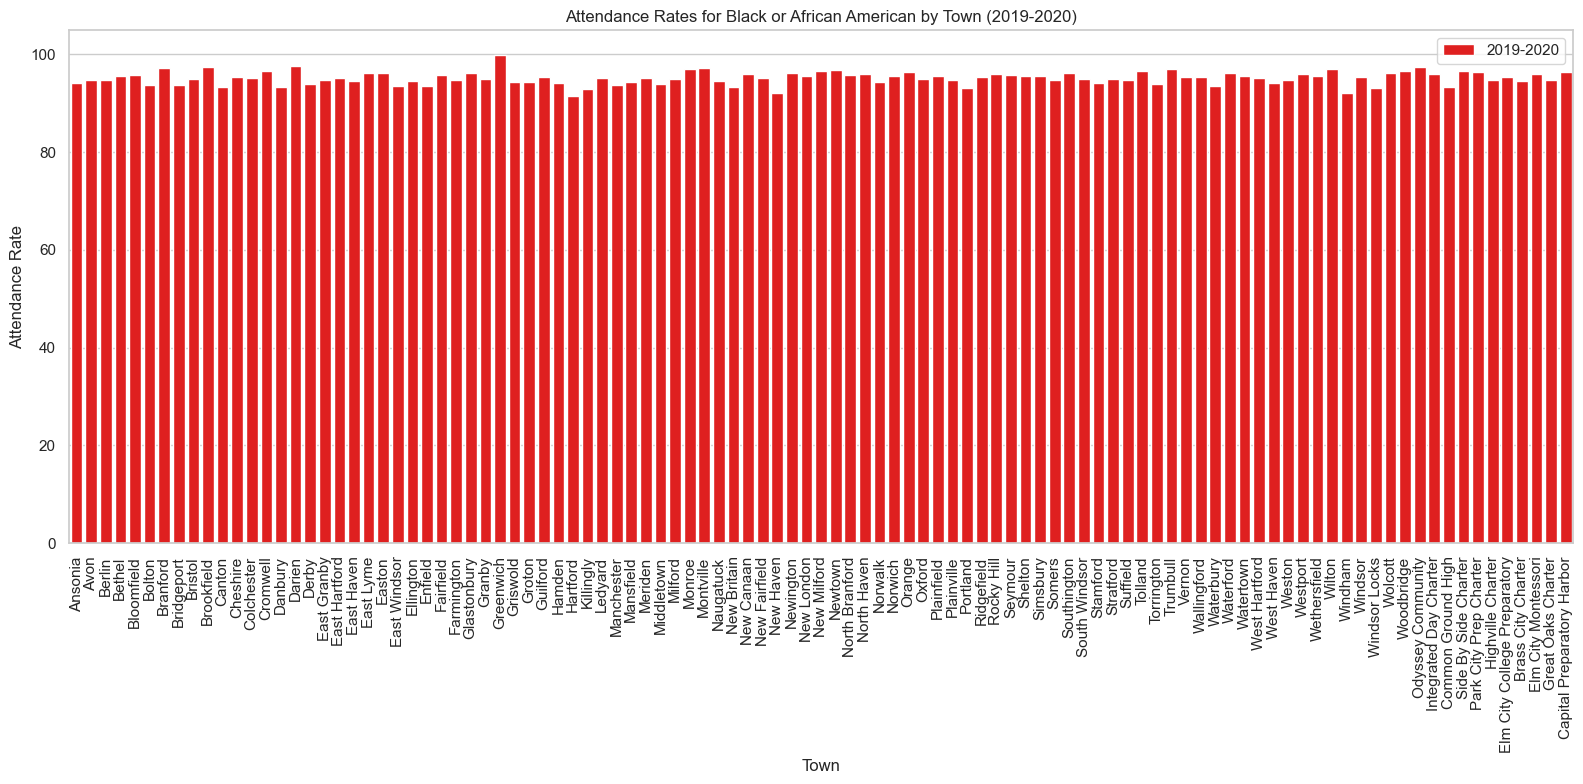

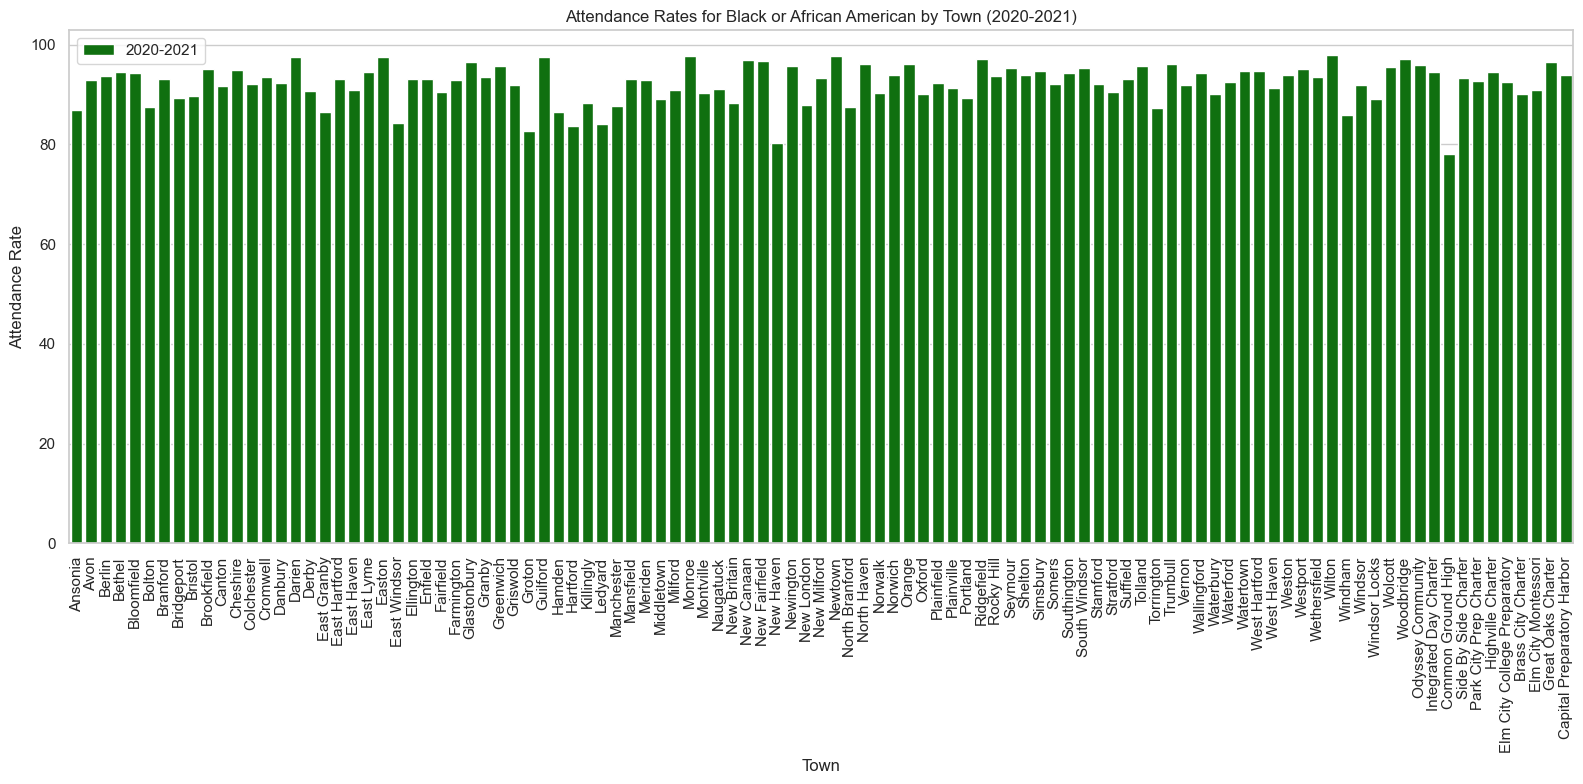

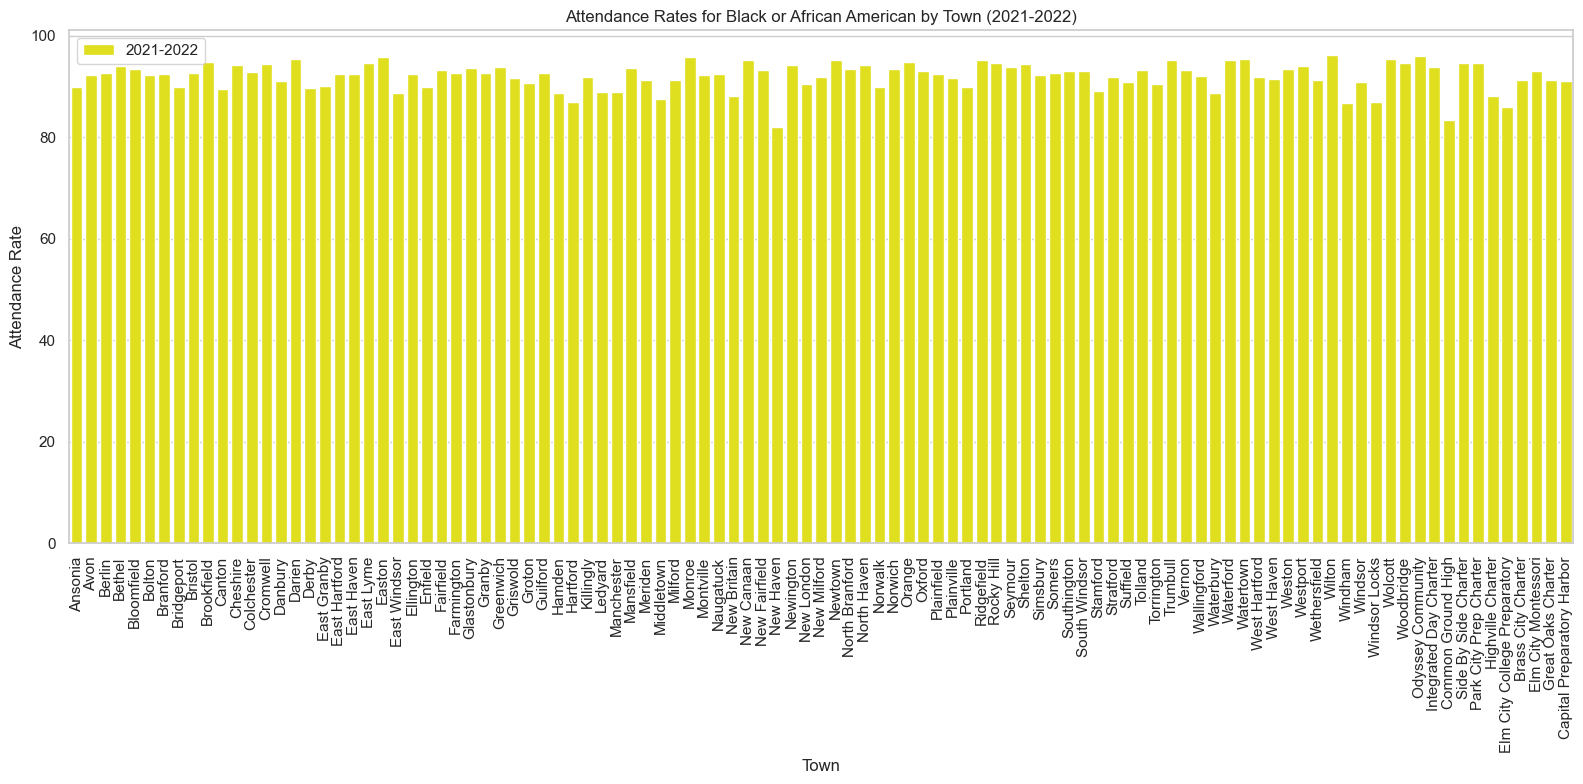

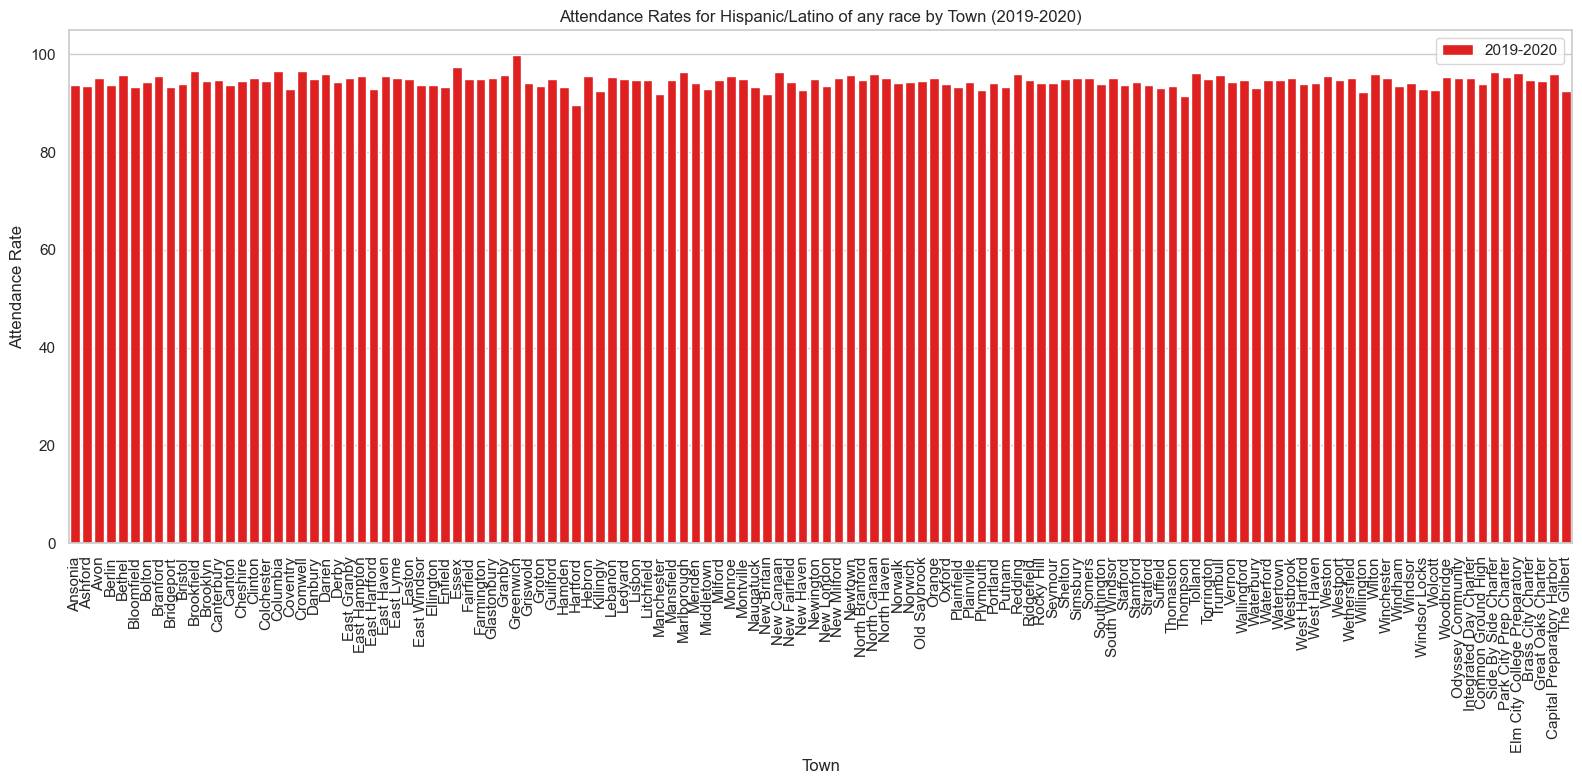

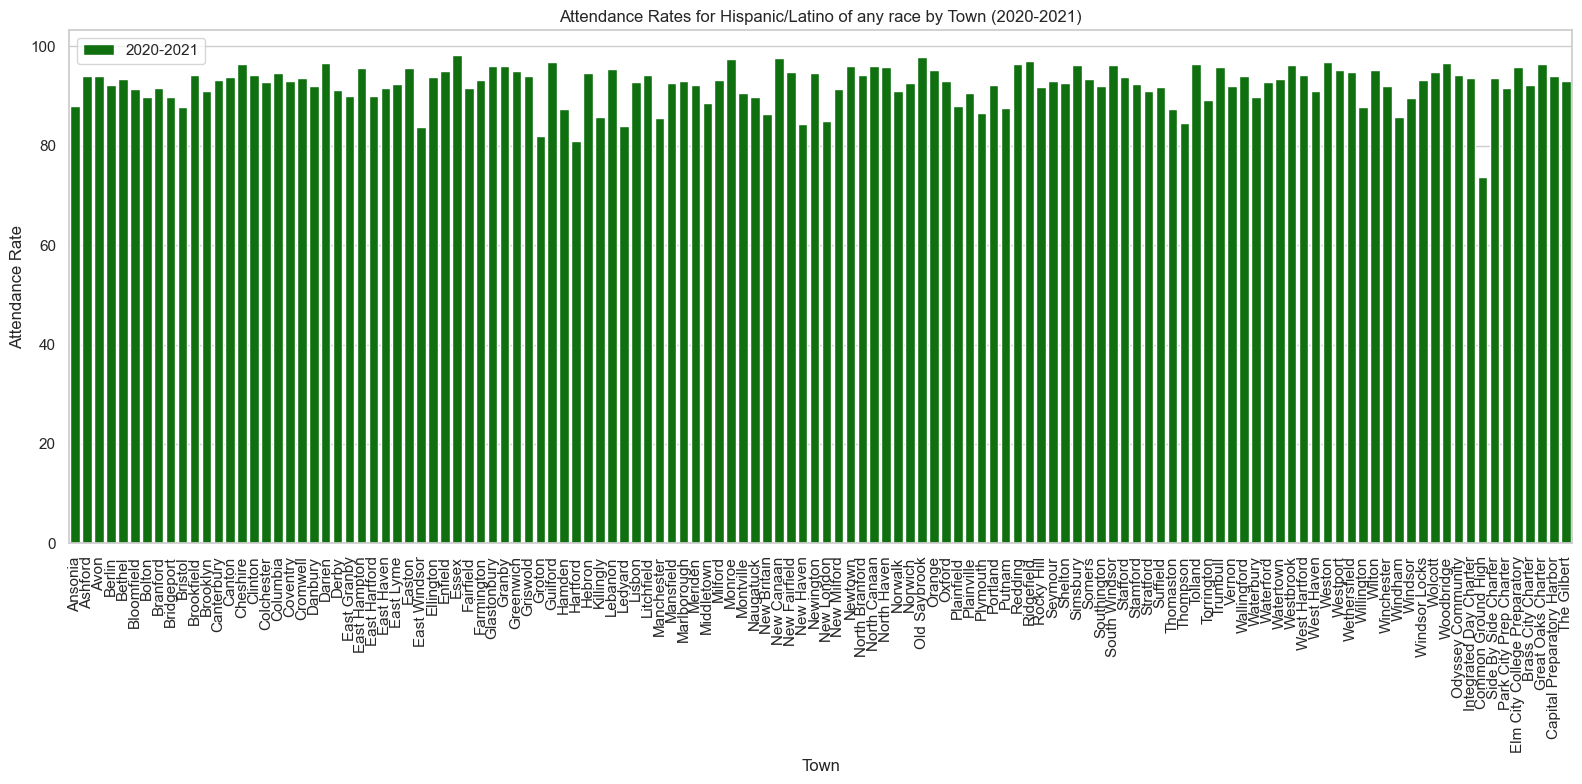

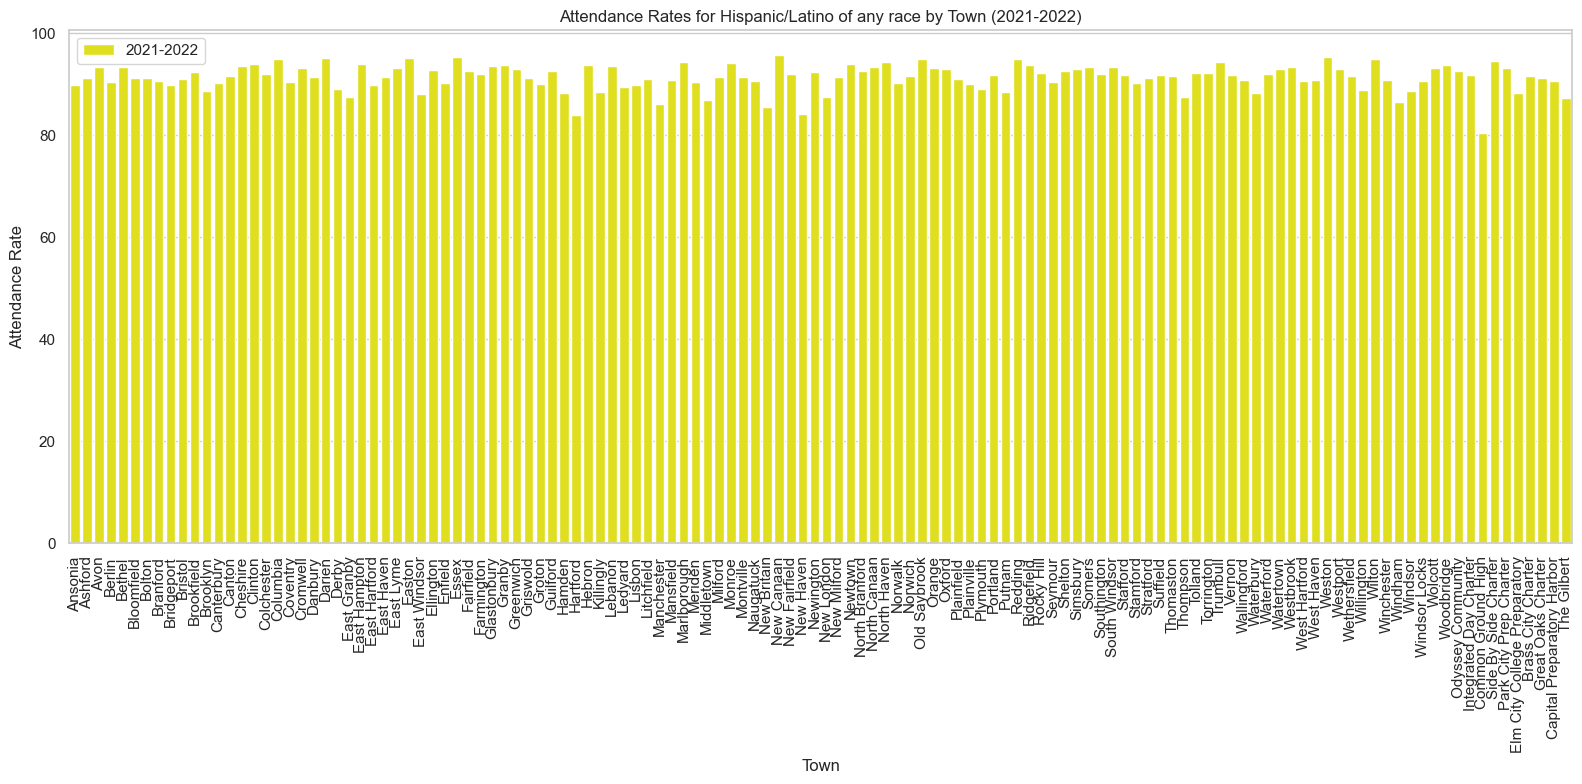

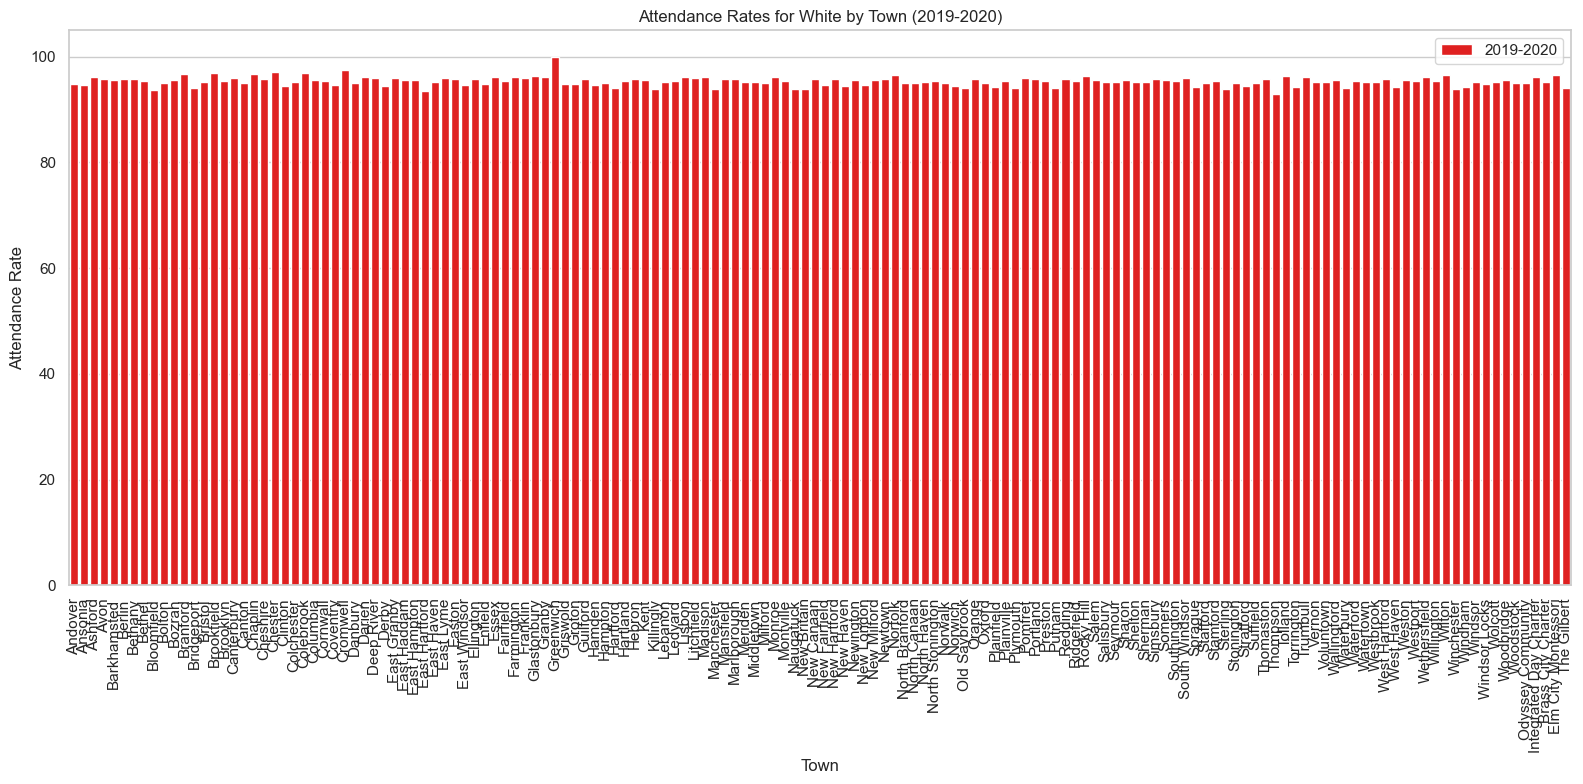

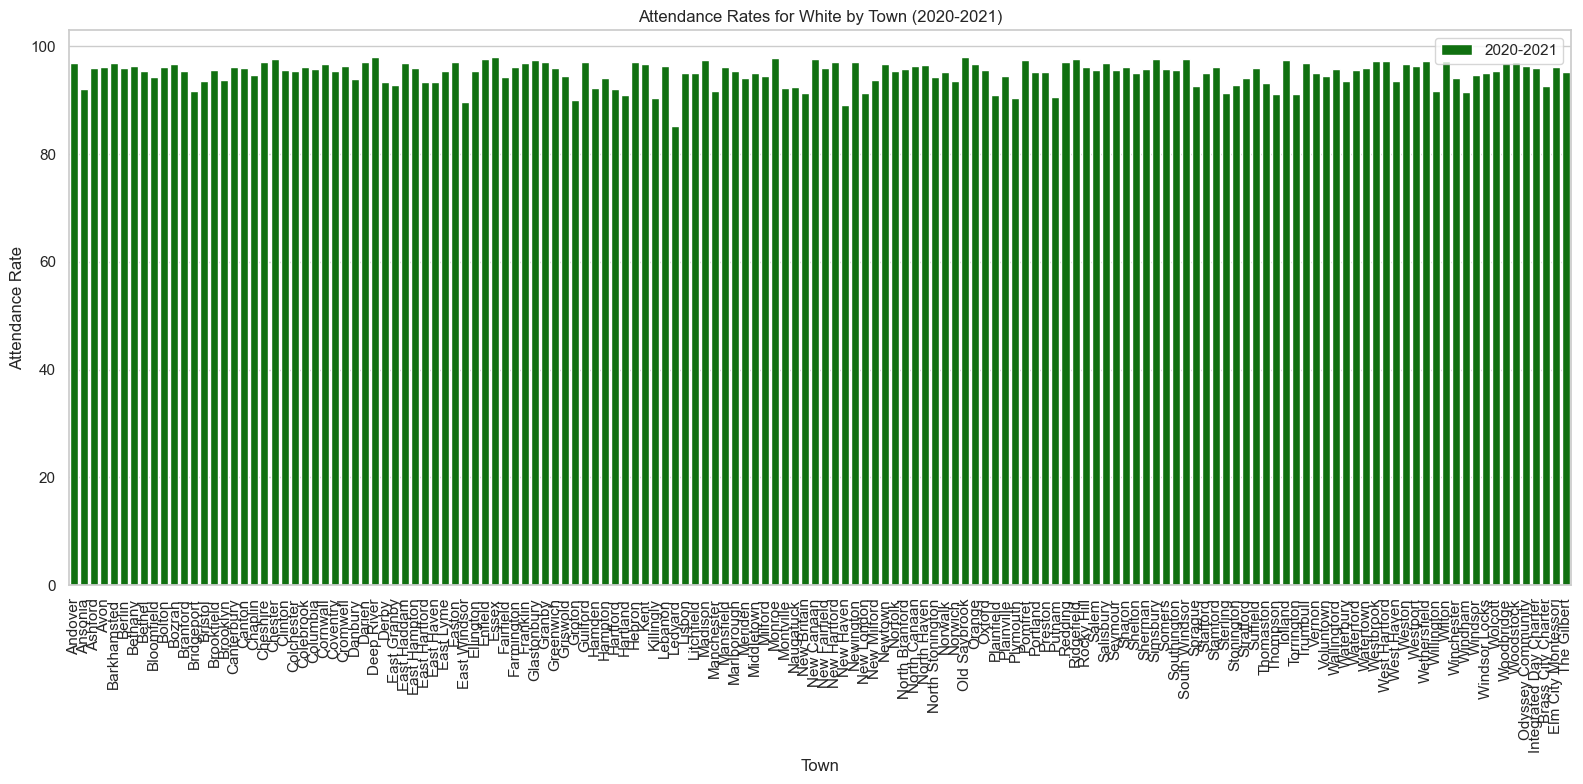

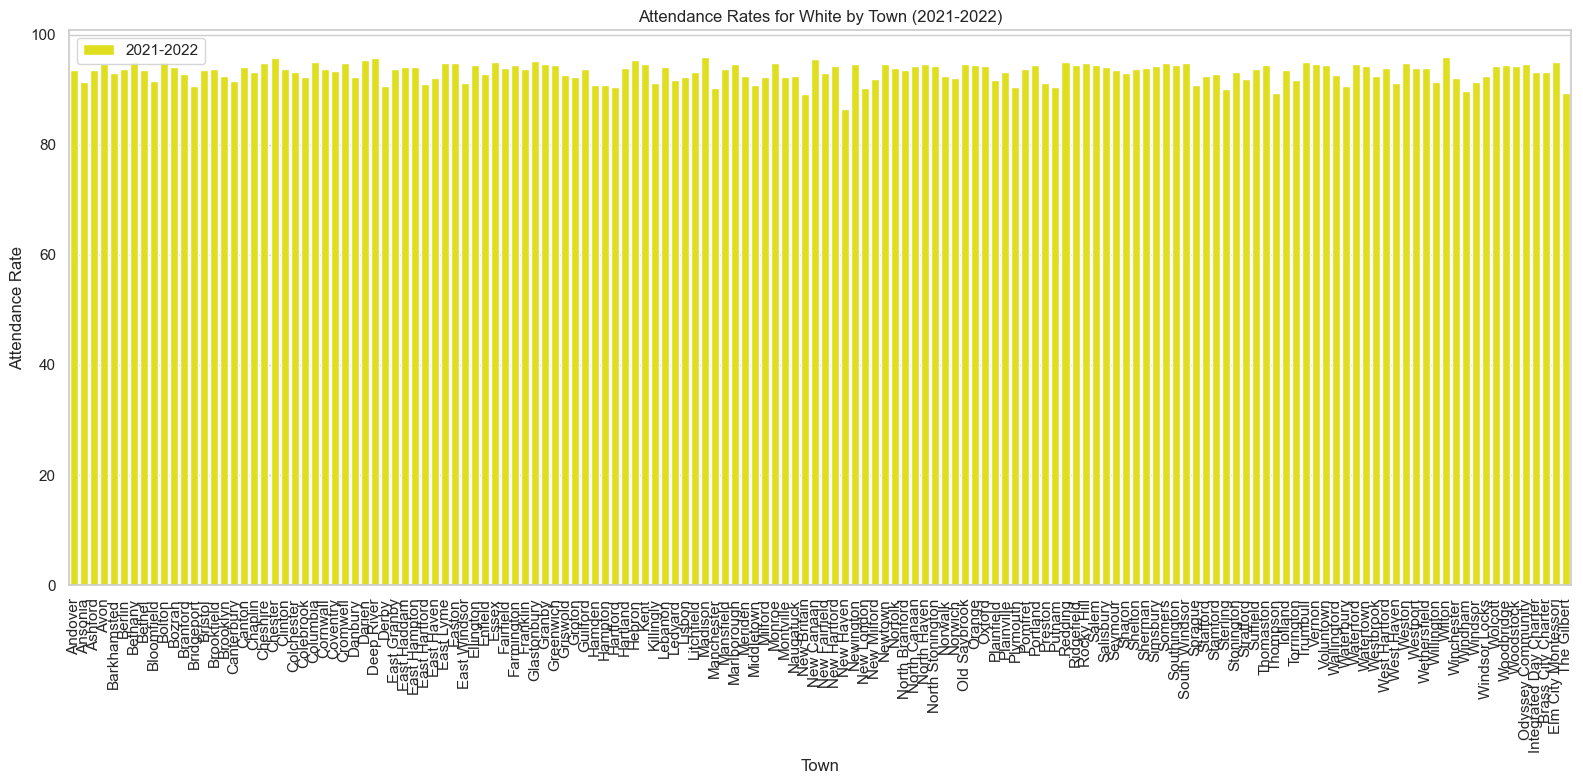

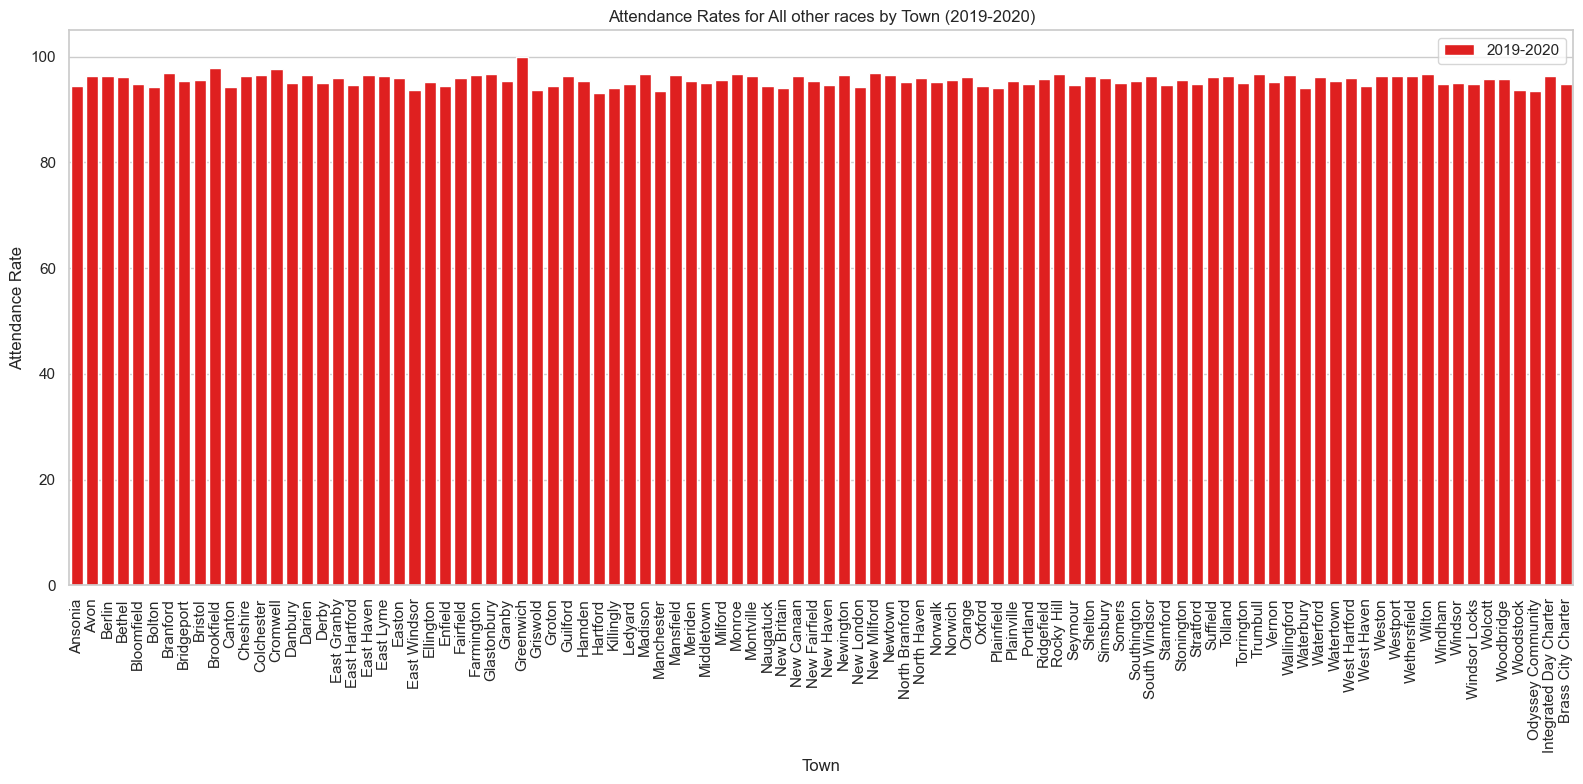

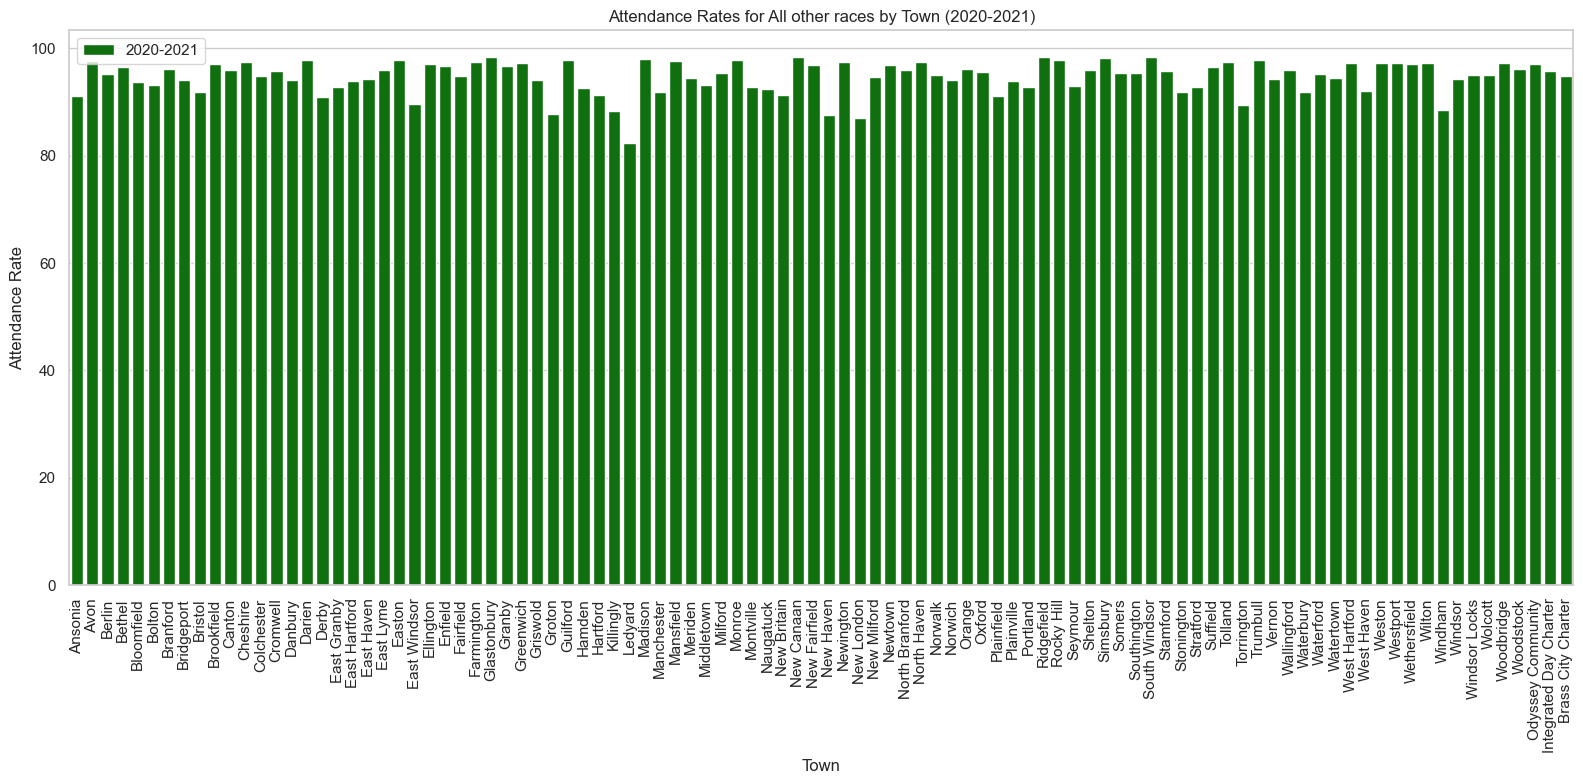

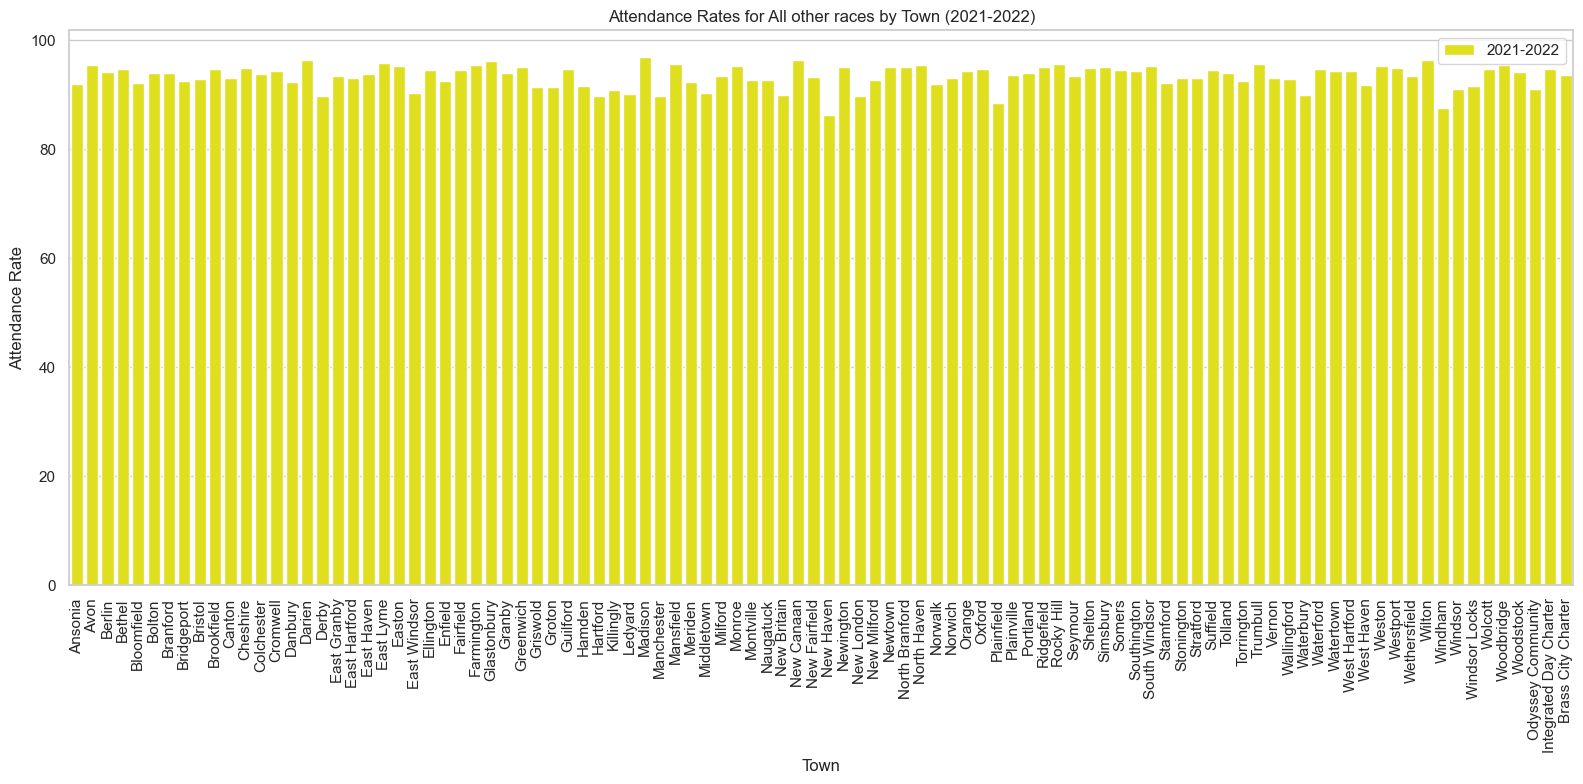

In [12]:
groups = list(set(att['Student group']))
print(groups)

for g in groups:
    for y in ['2019-2020','2020-2021', '2021-2022']:
        create_histogram(att, g, y)

In [13]:
print("Student Races \n" + "=" * 50)
print(set(att['Student group']))
print("Towns \n" + "=" * 50)
print(set(att['District name']))
print("Number of Towns \n" + "=" * 50)
print(len(set(att["District name"])))


Student Races 
{'Black or African American', 'Hispanic/Latino of any race', 'White', 'All other races'}
Towns 
{'Bethany', 'Derby', 'Great Oaks Charter', 'Wolcott', 'Coventry', 'Hartford', 'Park City Prep Charter', 'Middletown', 'Southington', 'Ansonia', 'Elm City College Preparatory', 'Hartland', 'Plainville', 'Windsor', 'Elm City Montessori', 'Common Ground High', 'Windham', 'Milford', 'Willington', 'Groton', 'Orange', 'Westbrook', 'Enfield', 'Bloomfield', 'West Haven', 'Capital Preparatory Harbor', 'Weston', 'Bethel', 'East Haven', 'Greenwich', 'Bolton', 'Fairfield', 'Shelton', 'Chaplin', 'Marlborough', 'New Canaan', 'Norwich', 'Woodstock', 'East Hartford', 'Bristol', 'North Canaan', 'Plymouth', 'Sprague', 'Clinton', 'Westport', 'Woodbridge', 'Easton', 'New Fairfield', 'Rocky Hill', 'Simsbury', 'North Haven', 'West Hartford', 'Trumbull', 'Lebanon', 'Columbia', 'East Hampton', 'Andover', 'Hamden', 'Thomaston', 'Newington', 'Granby', 'Hampton', 'Preston', 'South Windsor', 'Wilton', 'W

# Merged Dataset

In [14]:
att_col = list(att.columns)
att_col[0] = "Town name"
att.columns = att_col
att.head()
df = pd.merge(vac, att, on='Town name', how='inner')
print(len(set(df['Town name'])))

145


In [15]:
df.head()

,Town name,Vaccination status,Race/ethnicity,Data type,Value,Category,Student group,2021-2022 student count - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,2021-2022 attendance rate
0,Andover,At least one dose,Total,Percentage,75.6,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
1,Andover,At least one dose,NH Asian or Pacific Islander,Percentage,41.9,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
2,Andover,At least one dose,NH Black,Percentage,49.1,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
3,Andover,At least one dose,Hispanic,Percentage,69.9,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
4,Andover,At least one dose,NH White,Percentage,73.3,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65


In [16]:
print(set(df['Race/ethnicity']))
print(set(df['Student group']))


{'NH White', 'NH Black', 'Hispanic', 'NH Asian or Pacific Islander', 'NH American Indian', 'Total'}
{'Black or African American', 'Hispanic/Latino of any race', 'White', 'All other races'}


In [17]:
# Map the Race / ethnicity column to the student group inorder to group 
df['Race/ethnicity'] = df['Race/ethnicity'].replace({"NH Black": 'Black or African American' , 
                                                "Total": 'All other races',
                                                "NH White": "White",
                                                "Hispanic": 'Hispanic/Latino of any race'})
# Values to drop
values_to_drop = ['NH Asian or Pacific Islander', 'NH American Indian']
df = df[~df['Race/ethnicity'].isin(values_to_drop)]

print(sorted(set(df['Race/ethnicity'])))
print(sorted(set(df['Student group'])))
df.head()

['All other races', 'Black or African American', 'Hispanic/Latino of any race', 'White']
['All other races', 'Black or African American', 'Hispanic/Latino of any race', 'White']


,Town name,Vaccination status,Race/ethnicity,Data type,Value,Category,Student group,2021-2022 student count - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,2021-2022 attendance rate
0,Andover,At least one dose,All other races,Percentage,75.6,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
2,Andover,At least one dose,Black or African American,Percentage,49.1,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
3,Andover,At least one dose,Hispanic/Latino of any race,Percentage,69.9,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
4,Andover,At least one dose,White,Percentage,73.3,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65
5,Andover,Fully vaccinated,All other races,Percentage,72.0,Race/Ethnicity,White,134,115.0,96.99,128.0,94.79,93.65


# Sub Datarfames

In [18]:
all_race = df.loc[(df['Race/ethnicity'] == 'All other races') &
                  (df['Student group'] == 'All other races'),]
all_race = all_race.drop(columns = ['Race/ethnicity', 'Category', "Student group"])
all_black = df.loc[(df['Race/ethnicity'] == 'Black or African American') &
                   (df['Student group'] == 'Black or African American'),]
all_black = all_black.drop(columns = ['Race/ethnicity', 'Category', "Student group"])
all_hispanic = df.loc[(df['Race/ethnicity'] == 'Hispanic/Latino of any race') &
                   (df['Student group'] == 'Hispanic/Latino of any race'),]
all_hispanic = all_hispanic.drop(columns = ['Race/ethnicity', 'Category', "Student group"])
all_white = df.loc[(df['Race/ethnicity'] == 'White') &
                     (df['Student group'] == 'White'),]
all_white = all_white.drop(columns = ['Race/ethnicity', 'Category', "Student group"])

print(len(all_race))
print(len(all_black))
print(len(all_hispanic))
print(len(all_white))

190
184
232
290


In [19]:
all_race.head()

,Town name,Vaccination status,Data type,Value,2021-2022 student count - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,2021-2022 attendance rate
10,Ansonia,At least one dose,Percentage,71.1,149,166.0,91.05,170.0,94.51,91.91
34,Ansonia,Fully vaccinated,Percentage,66.3,149,166.0,91.05,170.0,94.51,91.91
78,Avon,At least one dose,Percentage,95.5,712,737.0,97.60,755.0,96.43,95.43
102,Avon,Fully vaccinated,Percentage,88.2,712,737.0,97.60,755.0,96.43,95.43
136,Berlin,At least one dose,Percentage,79.8,192,199.0,95.19,190.0,96.27,94.11


# Feature Engineering

In [20]:
# Adding No Vaccine row for each town
def add_no_vaccine_rows(df, vaccine_status):
    # Filter rows with the specified vaccination status
    selected_rows = df[df['Vaccination status'] == vaccine_status]

    # Create a new DataFrame for 'No Vaccine' rows
    no_vaccine_rows = selected_rows.copy()

    # Modify the 'Vaccination status' column
    no_vaccine_rows['Vaccination status'] = 'No Vaccine'

    # Modify the 'Value' column
    no_vaccine_rows['Value'] = 100 - no_vaccine_rows['Value']

    # Append the 'No Vaccine' rows to the original DataFrame
    df = pd.concat([df, no_vaccine_rows], ignore_index=True)

    return df

all_race = add_no_vaccine_rows(all_race, 'At least one dose')
all_black = add_no_vaccine_rows(all_black, 'At least one dose')
all_white = add_no_vaccine_rows(all_white, 'At least one dose')
all_hispanic = add_no_vaccine_rows(all_hispanic, 'At least one dose')

# Linear Regression

In [21]:
# Running all Linear Regression Models on all dataframes
def run_linear_regression(df, vaccination_status, race):
    df_filtered = df[df['Vaccination status'] == vaccination_status]

    X = df_filtered['Value'].values.reshape(-1, 1)
    y = df_filtered['2020-2021 attendance rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression().fit(X_train, y_train)
    
    # Predict Model
    y_pred = lr_model.predict(X_test)
    
    # Evaluate Model
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)
    print("R-SQUARE SCORE ({}, {}): {:.2f}".format(vaccination_status, race, r2_score(y_test, y_pred)))
          
    # Create Visual
    plt.scatter(X_test, y_test, color='black', label='Actual')
    colors = {"Fully vaccinated": 'cyan',
             'At least one dose': 'magenta',
             'No Vaccine': "green"}
    plt.plot(X_test, y_pred, color=colors[vaccination_status], linewidth=2, label='Linear Regression')
    
    if vaccination_status == 'No Vaccine':
        plt.xlabel("Non-Vaccinated Percentage")
    else:
        plt.xlabel('Vaccination Percentage')
    plt.ylabel('Attendance Rate')
    plt.title("{} vs. Attendance Rate for {}".format(vaccination_status, race))
    plt.legend()
    plt.savefig("MODEL/LR/{}_vs_AttendanceRate_({})".format(vaccination_status, race))

    plt.clf()
    
    return mse, mape

In [22]:
vaccination_statuses = ['Fully vaccinated', 'At least one dose', 'No Vaccine']
# Result DataFrame
lr_result_df = pd.DataFrame(index = vaccination_statuses, 
                        columns = ['All Races (MSE)','All Races (MAPE)', "Black (MSE)", "Black (MAPE)", 
                                   "White (MSE)", "White (MAPE)", "Hispanic (MSE)", "Hispanic (MAPE)"])

for status in vaccination_statuses:
    lr_all_mse, lr_all_mape = run_linear_regression(all_race, status, 'All Race')
    lr_black_mse, lr_black_mape = run_linear_regression(all_black, status, 'Black')
    lr_white_mse, lr_white_mape = run_linear_regression(all_white, status, 'White')
    lr_hispanic_mse, lr_hispanic_mape = run_linear_regression(all_hispanic, status, 'Hispanic')
        
    lr_result_df.loc[status] = [
        lr_all_mse, lr_all_mape,
        lr_black_mse, lr_black_mape,
        lr_white_mse, lr_white_mape,
        lr_hispanic_mse, lr_hispanic_mape
    ]

lr_result_df.head()

R-SQUARE SCORE (Fully vaccinated, All Race): -1.08
R-SQUARE SCORE (Fully vaccinated, Black): 0.11
R-SQUARE SCORE (Fully vaccinated, White): 0.56
R-SQUARE SCORE (Fully vaccinated, Hispanic): 0.10
R-SQUARE SCORE (At least one dose, All Race): -0.80
R-SQUARE SCORE (At least one dose, Black): 0.09
R-SQUARE SCORE (At least one dose, White): 0.55
R-SQUARE SCORE (At least one dose, Hispanic): 0.08
R-SQUARE SCORE (No Vaccine, All Race): -0.80
R-SQUARE SCORE (No Vaccine, Black): 0.09
R-SQUARE SCORE (No Vaccine, White): 0.55
R-SQUARE SCORE (No Vaccine, Hispanic): 0.08


,All Races (MSE),All Races (MAPE),Black (MSE),Black (MAPE),White (MSE),White (MAPE),Hispanic (MSE),Hispanic (MAPE)
Fully vaccinated,9.73,1.83,7.06,2.42,2.27,1.19,12.06,2.99
At least one dose,8.44,1.84,7.2,2.45,2.31,1.2,12.32,2.99
No Vaccine,8.44,1.84,7.2,2.45,2.31,1.2,12.32,2.99


<Figure size 640x480 with 0 Axes>

In [23]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
lr_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
lr_df = pd.get_dummies(lr_df)

# Prepare features (X) and target variable (y)
X = lr_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
               [col for col in lr_df.columns if col.startswith('Race/ethnicity')] + 
      [col for col in lr_df.columns if col.startswith('Vaccination status')]]
y = lr_df['2021-2022 attendance rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression().fit(X_train, y_train)

# Predict Model
y_pred = model.predict(X_test)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for Linear Regression:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)


Evaluation Metrics for Linear Regression:
--------------------------------------------------
Mean Squared Error: 1.36
Mean Absolute Percentage Error: 0.01
R-squared: 0.75


# Random Forest Regressor

In [24]:
def run_random_forest_regression(df, vaccination_status, race):
    df_filtered = df[df['Vaccination status'] == vaccination_status]

    X = df_filtered['Value'].values.reshape(-1, 1)
    y = df_filtered['2020-2021 attendance rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

    # Predcit Model
    y_pred = rf_model.predict(X_test)

    # Evaluate Model
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)
    print("R-SQUARE SCORE ({}, {}): {:.2f}".format(vaccination_status, race, r2_score(y_test, y_pred)))
    
    # Create Visual
    plt.scatter(X_test, y_test, color = 'black', label = 'Actual')
    colors = {"Fully vaccinated": 'cyan',
             'At least one dose': 'magenta',
              'No Vaccine': "green"}
    X_grid = np.arange(min(X_test), max(X_test), 1).reshape(-1, 1)
    
    plt.plot(X_grid, rf_model.predict(X_grid), color = colors[vaccination_status], label = 'Predicted')
    
    if vaccination_status == 'No Vaccine':
        plt.xlabel("Non-Vaccinated Percentage")
    else:
        plt.xlabel('Vaccination Percentage')

    plt.ylabel('Attendance Rate')
    plt.title("{} vs. Attendance Rate for {}".format(vaccination_status, race))
    plt.legend()
    plt.savefig("MODEL/RF/{}_vs_AttendanceRate_({})".format(vaccination_status, race))
    plt.clf()

    return mse, mape

In [25]:
vaccination_statuses = ['Fully vaccinated', 'At least one dose', 'No Vaccine']
rf_result_df = pd.DataFrame(index = vaccination_statuses, 
                        columns = ['All Races (MSE)','All Races (MAPE)', "Black (MSE)", "Black (MAPE)", 
                                   "White (MSE)", "White (MAPE)", "Hispanic (MSE)", "Hispanic (MAPE)"])
for status in vaccination_statuses:
    rf_all_mse, rf_all_mape = run_random_forest_regression(all_race, status, 'All Race')
    rf_black_mse, rf_black_mape = run_random_forest_regression(all_black, status, 'Black')
    rf_white_mse, rf_white_mape = run_random_forest_regression(all_white, status, 'White')
    rf_hispanic_mse, rf_hispanic_mape = run_random_forest_regression(all_hispanic, status, 'Hispanic')
        
    rf_result_df.loc[status] = [
        rf_all_mse, rf_all_mape,
        rf_black_mse, rf_black_mape,
        rf_white_mse, rf_white_mape,
        rf_hispanic_mse, rf_hispanic_mape
    ]
    
rf_result_df.head()

R-SQUARE SCORE (Fully vaccinated, All Race): -0.81
R-SQUARE SCORE (Fully vaccinated, Black): -0.67
R-SQUARE SCORE (Fully vaccinated, White): 0.57
R-SQUARE SCORE (Fully vaccinated, Hispanic): 0.39
R-SQUARE SCORE (At least one dose, All Race): -1.20
R-SQUARE SCORE (At least one dose, Black): -0.69
R-SQUARE SCORE (At least one dose, White): 0.55
R-SQUARE SCORE (At least one dose, Hispanic): 0.16
R-SQUARE SCORE (No Vaccine, All Race): -1.22
R-SQUARE SCORE (No Vaccine, Black): -0.65
R-SQUARE SCORE (No Vaccine, White): 0.55
R-SQUARE SCORE (No Vaccine, Hispanic): 0.15


,All Races (MSE),All Races (MAPE),Black (MSE),Black (MAPE),White (MSE),White (MAPE),Hispanic (MSE),Hispanic (MAPE)
Fully vaccinated,8.47,2.52,13.24,3.41,2.21,1.16,8.15,2.47
At least one dose,10.31,2.47,13.38,3.31,2.31,1.21,11.32,2.73
No Vaccine,10.39,2.52,13.09,3.26,2.31,1.22,11.49,2.76


<Figure size 640x480 with 0 Axes>

In [26]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
rf_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
rf_df = pd.get_dummies(rf_df)

# Prepare features (X) and target variable (y)
X = rf_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
               [col for col in rf_df.columns if col.startswith('Race/ethnicity')] + 
      [col for col in rf_df.columns if col.startswith('Vaccination status')]]
y = rf_df['2021-2022 attendance rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict Model
y_pred = model.predict(X_test)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for Random Forest Regressor:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)


Evaluation Metrics for Random Forest Regressor:
--------------------------------------------------
Mean Squared Error: 0.01
Mean Absolute Percentage Error: 0.0
R-squared: 1.0


In [27]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
rf_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
rf_df = pd.get_dummies(rf_df)

X = rf_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
               [col for col in rf_df.columns if col.startswith('Race/ethnicity')] + 
      [col for col in rf_df.columns if col.startswith('Vaccination status')]]
y = rf_df['2021-2022 attendance rate']

# Standard Scaler
X_std = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict Model
y_pred = model.predict(X_test)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for Random Forest Regressor w/ StandardScaler:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)


Evaluation Metrics for Random Forest Regressor w/ StandardScaler:
--------------------------------------------------
Mean Squared Error: 0.01
Mean Absolute Percentage Error: 0.0
R-squared: 1.0


# Decision Tree Regressor

In [28]:
def run_decision_tree_regression(df, vaccination_status, race):
    df_filtered = df[df['Vaccination status'] == vaccination_status]

    X = df_filtered['Value'].values.reshape(-1, 1)
    y = df_filtered['2020-2021 attendance rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Decision Tree Regressor Model
    dt_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

    # Predict Model
    y_pred = dt_model.predict(X_test)

    # Evaluate Model
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)
    print("R-SQUARE SCORE ({}, {}): {:.2f}".format(vaccination_status, race, r2_score(y_test, y_pred)))
    
    # Create Visual
    plt.scatter(X_test, y_test, color='black', label='Actual')
    colors = {"Fully vaccinated": 'cyan',
             'At least one dose': 'magenta',
             'No Vaccine': "green"}
    plt.scatter(X_test, y_pred, color = colors[vaccination_status], label = 'Predicted')
    
    if vaccination_status == 'No Vaccine':
        plt.xlabel("Non-Vaccinated Percentage")
    else:
        plt.xlabel('Vaccination Percentage')
    plt.ylabel('Attendance Rate')
    
    plt.title("{} vs. Attendance Rate for {}".format(vaccination_status, race))
    plt.legend()
    plt.savefig("MODEL/DT/{}_vs_AttendanceRate_({})".format(vaccination_status, race))
    
    plt.clf()

    return mse, mape

In [29]:
vaccination_statuses = ['Fully vaccinated', 'At least one dose', 'No Vaccine']
dt_result_df = pd.DataFrame(index = vaccination_statuses, 
                        columns = ['All Races (MSE)','All Races (MAPE)', "Black (MSE)", "Black (MAPE)", 
                                   "White (MSE)", "White (MAPE)", "Hispanic (MSE)", "Hispanic (MAPE)"])
for status in vaccination_statuses:
    dt_all_mse, dt_all_mape = run_decision_tree_regression(all_race, status, 'All Race')
    dt_black_mse, dt_black_mape = run_decision_tree_regression(all_black, status, 'Black')
    dt_white_mse, dt_white_mape = run_decision_tree_regression(all_white, status, 'White')
    dt_hispanic_mse, dt_hispanic_mape = run_decision_tree_regression(all_hispanic, status, 'Hispanic')
        
    dt_result_df.loc[status] = [
        dt_all_mse, dt_all_mape,
        dt_black_mse, dt_black_mape,
        dt_white_mse, dt_white_mape,
        dt_hispanic_mse, dt_hispanic_mape
    ]
    
dt_result_df.head()

R-SQUARE SCORE (Fully vaccinated, All Race): -1.68
R-SQUARE SCORE (Fully vaccinated, Black): -1.65
R-SQUARE SCORE (Fully vaccinated, White): 0.44
R-SQUARE SCORE (Fully vaccinated, Hispanic): 0.21
R-SQUARE SCORE (At least one dose, All Race): -3.57
R-SQUARE SCORE (At least one dose, Black): -1.90
R-SQUARE SCORE (At least one dose, White): 0.43
R-SQUARE SCORE (At least one dose, Hispanic): -0.23
R-SQUARE SCORE (No Vaccine, All Race): -3.58
R-SQUARE SCORE (No Vaccine, Black): -1.77
R-SQUARE SCORE (No Vaccine, White): 0.43
R-SQUARE SCORE (No Vaccine, Hispanic): -0.23


,All Races (MSE),All Races (MAPE),Black (MSE),Black (MAPE),White (MSE),White (MAPE),Hispanic (MSE),Hispanic (MAPE)
Fully vaccinated,12.56,2.99,21.05,4.3,2.86,1.34,10.55,2.68
At least one dose,21.38,3.32,22.98,4.19,2.92,1.48,16.49,3.1
No Vaccine,21.42,3.37,21.94,4.08,2.93,1.48,16.49,3.1


<Figure size 640x480 with 0 Axes>

In [30]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
dt_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
dt_df = pd.get_dummies(dt_df)

X = dt_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
               [col for col in dt_df.columns if col.startswith('Race/ethnicity')] + 
      [col for col in dt_df.columns if col.startswith('Vaccination status')]]
y = dt_df['2021-2022 attendance rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor Model
model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# Predict Model
y_pred = model.predict(X_test)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for Decision Tree Regresssor:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)

Evaluation Metrics for Decision Tree Regresssor:
--------------------------------------------------
Mean Squared Error: 0.01
Mean Absolute Percentage Error: 0.0
R-squared: 1.0


In [31]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)
print("Evaluation Metrics for Decision Tree Regressor w/ Hyperparameter tuning" + "-" * 50)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict Best Model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = round(mean_squared_error(y_test, y_pred_tuned), 2)
mape_tuned = round(mean_absolute_percentage_error(y_test, y_pred_tuned), 2)
r2_tuned = round(r2_score(y_test, y_pred_tuned), 2)

# Display evaluation metrics for the tuned model
print("Tuned Model Metrics:")
print("Mean Squared Error:", mse_tuned)
print("Mean Absolute Percentage Error:", mape_tuned)
print("R-squared:", r2_tuned)


Evaluation Metrics for Decision Tree Regressor w/ Hyperparameter tuning--------------------------------------------------
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Model Metrics:
Mean Squared Error: 0.01
Mean Absolute Percentage Error: 0.0
R-squared: 1.0


# XGBoost Regressor

In [32]:
def run_xgboost_regression(df, vaccination_status, race):
    df_filtered = df[df['Vaccination status'] == vaccination_status]

    X = df_filtered['Value'].values.reshape(-1, 1)
    y = df_filtered['2020-2021 attendance rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBRegressor Model
    xgb_model = XGBRegressor(random_state=42).fit(X_train, y_train)

    # Predict Model
    y_pred = xgb_model.predict(X_test)
    
    # Evaluate Model
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)
    print("R-SQUARE SCORE ({},{}): {:.2f}".format(vaccination_status, race, r2_score(y_test, y_pred)))
          
    # Create Visual
    plt.scatter(X_test, y_test, color='black', label='Predicted')
    colors = {"Fully vaccinated": 'cyan',
             'At least one dose': 'magenta',
             'No Vaccine': "green"}
    plt.scatter(X_test, y_pred, color=colors[vaccination_status], label = 'XGBoost Regression')

    if vaccination_status == 'No Vaccine':
        plt.xlabel("Non-Vaccinated Percentage")
    else:
        plt.xlabel('Vaccination Percentage')
    plt.ylabel('Attendance Rate')
    plt.title("{} vs. Attendance Rate for {}".format(vaccination_status, race))
    plt.legend()
    plt.savefig("MODEL/XGB/{}_vs_AttendanceRate_({})".format(vaccination_status, race))
    
    plt.clf()
    
    return mse, mape

In [33]:
vaccination_statuses = ['Fully vaccinated', 'At least one dose', 'No Vaccine']
xgb_result_df = pd.DataFrame(index = vaccination_statuses, 
                        columns = ['All Races (MSE)','All Races (MAPE)', "Black (MSE)", "Black (MAPE)", 
                                   "White (MSE)", "White (MAPE)", "Hispanic (MSE)", "Hispanic (MAPE)"])
for status in vaccination_statuses:
    xgb_all_mse, xgb_all_mape = run_xgboost_regression(all_race, status, 'All Race')
    xgb_black_mse, xgb_black_mape = run_xgboost_regression(all_black, status, 'Black')
    xgb_white_mse, xgb_white_mape = run_xgboost_regression(all_white, status, 'White')
    xgb_hispanic_mse, xgb_hispanic_mape = run_xgboost_regression(all_hispanic, status, 'Hispanic')
        
    xgb_result_df.loc[status] = [
        xgb_all_mse, xgb_all_mape,
        xgb_black_mse, xgb_black_mape,
        xgb_white_mse, xgb_white_mape,
        xgb_hispanic_mse, xgb_hispanic_mape
    ]
    
xgb_result_df.head()

R-SQUARE SCORE (Fully vaccinated,All Race): -2.20
R-SQUARE SCORE (Fully vaccinated,Black): -1.44
R-SQUARE SCORE (Fully vaccinated,White): 0.41
R-SQUARE SCORE (Fully vaccinated,Hispanic): -0.45
R-SQUARE SCORE (At least one dose,All Race): -3.06
R-SQUARE SCORE (At least one dose,Black): -0.96
R-SQUARE SCORE (At least one dose,White): 0.56
R-SQUARE SCORE (At least one dose,Hispanic): -0.31
R-SQUARE SCORE (No Vaccine,All Race): -0.78
R-SQUARE SCORE (No Vaccine,Black): -1.33
R-SQUARE SCORE (No Vaccine,White): 0.62
R-SQUARE SCORE (No Vaccine,Hispanic): -0.22


,All Races (MSE),All Races (MAPE),Black (MSE),Black (MAPE),White (MSE),White (MAPE),Hispanic (MSE),Hispanic (MAPE)
Fully vaccinated,14.99,3.26,19.38,4.14,3.01,1.42,19.46,3.8
At least one dose,18.99,3.11,15.54,3.35,2.24,1.25,17.54,3.45
No Vaccine,8.35,2.47,18.51,3.94,1.98,1.23,16.37,3.11


<Figure size 640x480 with 0 Axes>

In [34]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
xgb_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
xgb_df = pd.get_dummies(xgb_df)

# Prepare features (X) and target variable (y)
X = xgb_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
           [col for col in xgb_df.columns if col.startswith('Race/ethnicity')] + 
           [col for col in xgb_df.columns if col.startswith('Vaccination status')]]
y = xgb_df['2021-2022 attendance rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regresor Model
xgb_model = XGBRegressor(random_state=42).fit(X_train, y_train)

# Predict Model 
y_pred = xgb_model.predict(X_test)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred) * 100, 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for XGBoost Regressor:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)

Evaluation Metrics for XGBoost Regressor:
--------------------------------------------------
Mean Squared Error: 0.02
Mean Absolute Percentage Error: 0.07
R-squared: 1.0


In [35]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict Best Model
y_pred_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = round(mean_squared_error(y_test, y_pred_tuned), 2)
mape_tuned = round(mean_absolute_percentage_error(y_test, y_pred_tuned) * 100, 2)
r2_tuned = round(r2_score(y_test, y_pred_tuned), 2)

# Display evaluation metrics for the tuned model
print("\nEvaluation Metrics for Tuned XGBoost Regressor:\n" + "-" * 50)
print("Mean Squared Error (Tuned):", mse_tuned)
print("Mean Absolute Percentage Error (Tuned):", mape_tuned)
print("R-squared (Tuned):", r2_tuned)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Evaluation Metrics for Tuned XGBoost Regressor:
--------------------------------------------------
Mean Squared Error (Tuned): 0.02
Mean Absolute Percentage Error (Tuned): 0.08
R-squared (Tuned): 1.0


# Support Vector Regression

In [36]:
def run_svr_regression(df, vaccination_status, race):
    df_filtered = df[df['Vaccination status'] == vaccination_status]

    X = df_filtered['Value'].values.reshape(-1, 1)
    y = df_filtered['2020-2021 attendance rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVR Model
    svr_model = SVR(kernel='linear') .fit(X_train_scaled, y_train)

    # Predict Model
    y_pred = svr_model.predict(X_test_scaled)
    
    # Evaluate Model
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)
    print("R-SQUARE SCORE ({}, {}): {:.2f}".format(vaccination_status, race, r2_score(y_test, y_pred)))
          
    # Create Visual
    plt.scatter(X_test, y_test, color='black', label='Actual')
    colors = {"Fully vaccinated": 'cyan',
             'At least one dose': 'magenta',
             'No Vaccine': "green"}
    plt.plot(X_test, y_pred, color=colors[vaccination_status], label = 'Predicted')
    
    if vaccination_status == 'No Vaccine':
        plt.xlabel("Non-Vaccinated Percentage")
    else:
        plt.xlabel('Vaccination Percentage')
    plt.ylabel('Attendance Rate')
    plt.title("{} vs. Attendance Rate for {}".format(vaccination_status, race))
    plt.legend()
    
    plt.savefig("MODEL/SVR/{}_vs_AttendanceRate_({})".format(vaccination_status, race))
    #plt.show()
    plt.clf()
    
    return mse, mape

In [37]:
vaccination_statuses = ['Fully vaccinated', 'At least one dose', 'No Vaccine']
svr_result_df = pd.DataFrame(index = vaccination_statuses, 
                        columns = ['All Races (MSE)','All Races (MAPE)', "Black (MSE)", "Black (MAPE)", 
                                   "White (MSE)", "White (MAPE)", "Hispanic (MSE)", "Hispanic (MAPE)"])
for status in vaccination_statuses:
    svr_all_mse, svr_all_mape = run_svr_regression(all_race, status, 'All Race')
    svr_black_mse, svr_black_mape = run_svr_regression(all_black, status, 'Black')
    svr_white_mse, svr_white_mape = run_svr_regression(all_white, status, 'White')
    svr_hispanic_mse, svr_hispanic_mape = run_svr_regression(all_hispanic, status, 'Hispanic')
        
    svr_result_df.loc[status] = [
        svr_all_mse, svr_all_mape,
        svr_black_mse, svr_black_mape,
        svr_white_mse, svr_white_mape,
        svr_hispanic_mse, svr_hispanic_mape
    ]
    
svr_result_df.head()

R-SQUARE SCORE (Fully vaccinated, All Race): -0.93
R-SQUARE SCORE (Fully vaccinated, Black): 0.03
R-SQUARE SCORE (Fully vaccinated, White): 0.54
R-SQUARE SCORE (Fully vaccinated, Hispanic): 0.10
R-SQUARE SCORE (At least one dose, All Race): -0.59
R-SQUARE SCORE (At least one dose, Black): 0.02
R-SQUARE SCORE (At least one dose, White): 0.53
R-SQUARE SCORE (At least one dose, Hispanic): 0.11
R-SQUARE SCORE (No Vaccine, All Race): -0.59
R-SQUARE SCORE (No Vaccine, Black): 0.02
R-SQUARE SCORE (No Vaccine, White): 0.53
R-SQUARE SCORE (No Vaccine, Hispanic): 0.11


,All Races (MSE),All Races (MAPE),Black (MSE),Black (MAPE),White (MSE),White (MAPE),Hispanic (MSE),Hispanic (MAPE)
Fully vaccinated,9.04,1.83,7.72,2.49,2.34,1.18,12.12,2.98
At least one dose,7.42,1.8,7.74,2.51,2.4,1.21,11.99,2.85
No Vaccine,7.42,1.8,7.74,2.51,2.4,1.21,11.99,2.85


<Figure size 640x480 with 0 Axes>

In [38]:
selected_columns = ['Vaccination status', 'Race/ethnicity', '2021-2022 attendance rate',
                     '2020-2021 attendance rate', '2019-2020 attendance rate']
xgb_df = df[selected_columns]

# Convert categorical variables to numerical using one-hot encoding
xgb_df = pd.get_dummies(xgb_df)

# Prepare features (X) and target variable (y)
X = xgb_df[['2020-2021 attendance rate', '2019-2020 attendance rate'] + 
           [col for col in xgb_df.columns if col.startswith('Race/ethnicity')] + 
           [col for col in xgb_df.columns if col.startswith('Vaccination status')]]
y = xgb_df['2021-2022 attendance rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR Model
svr_model = SVR(kernel = 'linear').fit(X_train_scaled, y_train)

# Predict Model
y_pred = svr_model.predict(X_test_scaled)

# Evaluate Model
mse = round(mean_squared_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred) * 100, 2)
r2 = round(r2_score(y_test, y_pred), 2)

# Display evaluation metrics
print("Evaluation Metrics for SVR Regressor:\n" + "-" * 50)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)

Evaluation Metrics for SVR Regressor:
--------------------------------------------------
Mean Squared Error: 1.42
Mean Absolute Percentage Error: 1.0
R-squared: 0.74
